# Hyperplanes

## Definition
a hyperplane is a subspace whose dimension is one less than that of its ambient space.

## Examples
* 1D hyperplane is a single point
* 2D hyperplane is a line
* 3D hyperplane is a flat plane  

## Intuition

__Main idea behind SVM is that we can use hyperplanes to create a separation between classes.__  

To pick the best separator between the classes, we find the one that maximizes the margins between the classes. __(Maximal margin classifier)__

The same idea applies to N-dimensions.  

## When the classes aren't easily separable -- Support Vector Classifier

* This idea is based on a simple premise: allow SVM to make a certain   number of mistakes and keep margin as wide as possible so that       other points can still be classified correctly. This can be done     simply by modifying the objective of SVM. __(Support vector           classifier)__

* This approach increases bias to reduce variance (there is high       variance in the maximal margin approach in this scenario).

__When classes aren't separable at all -- Use Support Vector Machines__.  

# Kernel

* Allows us to move beyond SVC and use SVM.
* It is used to project features to a higher dimension.

## Kernel Trick

* It avoids having to project features to higher dimension by taking   advantage of the transpositions of data.



In [10]:
# Plotting function

import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import pandas as pd

def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [8]:
df = pd.read_csv('~/Documents/Data Science Masterclass/DATA/mouse_viral_study.csv')

In [9]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


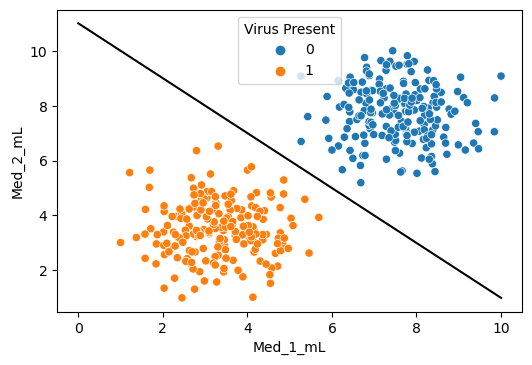

In [18]:
plt.figure(dpi=100)
sbn.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

# Creating hyperplane

x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m * x + b

plt.plot(x, y, 'black')

In [19]:
from sklearn.svm import SVC

In [20]:
y = df['Virus Present']

In [21]:
X = df.drop('Virus Present', axis=1)

In [70]:
model = SVC(kernel='linear', C=1000) # C value should be high for lesser margin of error

In [71]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

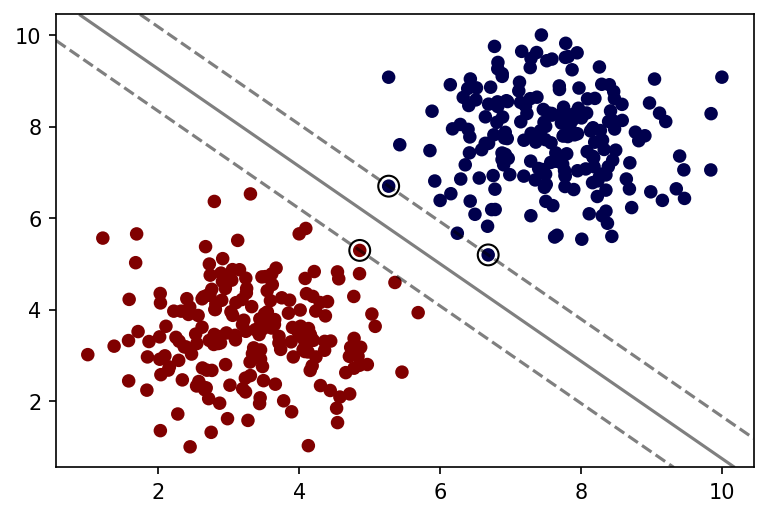

In [72]:
plt.figure(dpi=150)
plot_svm_boundary(model, X, y)

# Using Radial Basis Function as Kernel

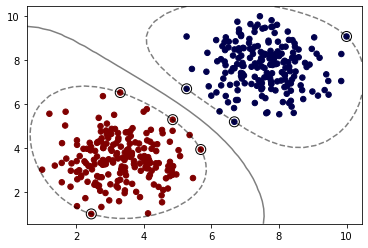

In [39]:
model = SVC(C=1000, gamma='scale') # RBF is the default kernel
model.fit(X,y)
plot_svm_boundary(model, X, y)

# A higher float value for gamma means we are overfitting

# Using Sigmoid Kernel

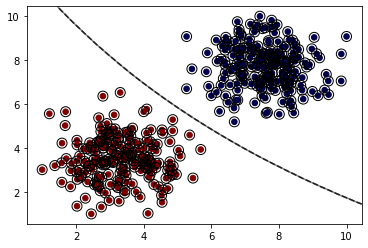

In [43]:
model = SVC(kernel ='sigmoid', C=1000) 
model.fit(X,y)
plot_svm_boundary(model, X, y)

# Using Polynomial Kernel

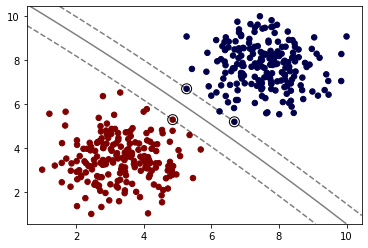

In [49]:
model = SVC(kernel='poly', C=1000, degree=3) 
model.fit(X,y)
plot_svm_boundary(model, X, y)

# Using CV For Determining Good C Values and Kernels

In [50]:
from sklearn.model_selection import GridSearchCV

In [63]:
svm = SVC()
param_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf'],
}

In [64]:
grid = GridSearchCV(svm, param_grid)

In [65]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [66]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

# Support Vector Regression

In [73]:
df = pd.read_csv('~/Documents/Data Science Masterclass/DATA/cement_slump.csv')

In [74]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [75]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [76]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)

In [77]:
y = df['Compressive Strength (28-day)(Mpa)']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [82]:
scaled_X_train = scaler.fit_transform(X_train)

In [83]:
scaled_X_test = scaler.transform(X_test)

In [84]:
from sklearn.svm import SVR, LinearSVR
# Use LinearSVR only with linear kernel for faster computation

base_model = SVR()

In [85]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [87]:
base_preds = base_model.predict(scaled_X_test)

In [90]:
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_test, base_preds))
RMSE

6.695914838327133

In [91]:
y_test.mean()

36.26870967741935

In [114]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
}

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
svr = SVR()

In [117]:
grid = GridSearchCV(svr, param_grid)

In [118]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [119]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [120]:
grid_preds = grid.predict(scaled_X_test)

In [121]:
RMSE = np.sqrt(mean_squared_error(y_test, grid_preds))
RMSE

3.1782103051198347